In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [38]:

import matplotlib.pyplot as plt

In [39]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Загрузка датасета MNIST
mnist = fetch_openml('mnist_784', version=1)

# Разделим данные и метки
X = mnist.data
y = mnist.target.astype(int)

# Разделение на обучающую и тестовую выборки
# Укажем размер тестовой выборки как 10,000 примеров
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=1)

# Проверим размеры полученных выборок
print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")


/opt/conda/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Размер обучающей выборки: (60000, 784)
Размер тестовой выборки: (10000, 784)


In [40]:
# Преобразуем изображения в формат NumPy
X_train = X_train.to_numpy()  # Преобразуем в массив NumPy
X_test = X_test.to_numpy()

# Нормализуем данные, приводя значения к диапазону [0, 1]
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

#переведем таргеты в Numpy
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [41]:
X_train.shape

(60000, 784)

In [42]:
#Проверим размерность загруженных данных 
print(f"Количество объектов в train = {len(X_train_normalized)}")
print(f"Количество объектов в test = {len(X_test_normalized)}")

Количество объектов в train = 60000
Количество объектов в test = 10000


Примеры изображений и меток для тренировочной выборки:


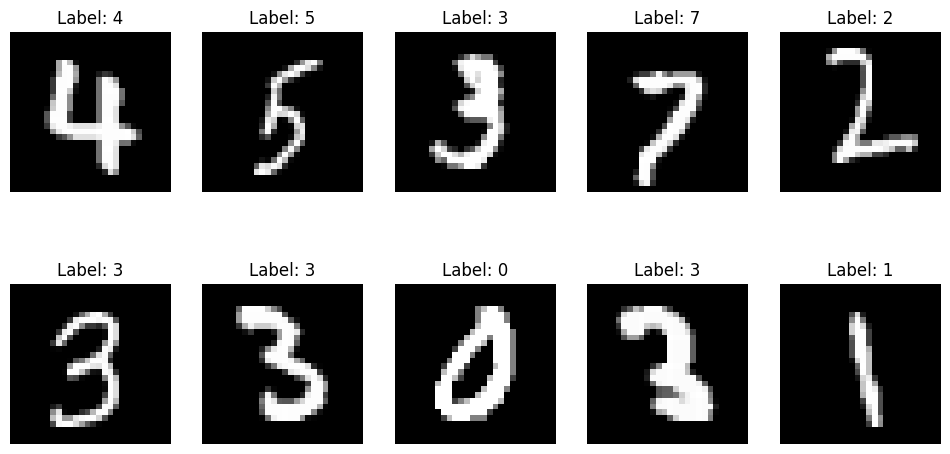

Примеры изображений и меток для тестовой выборки:


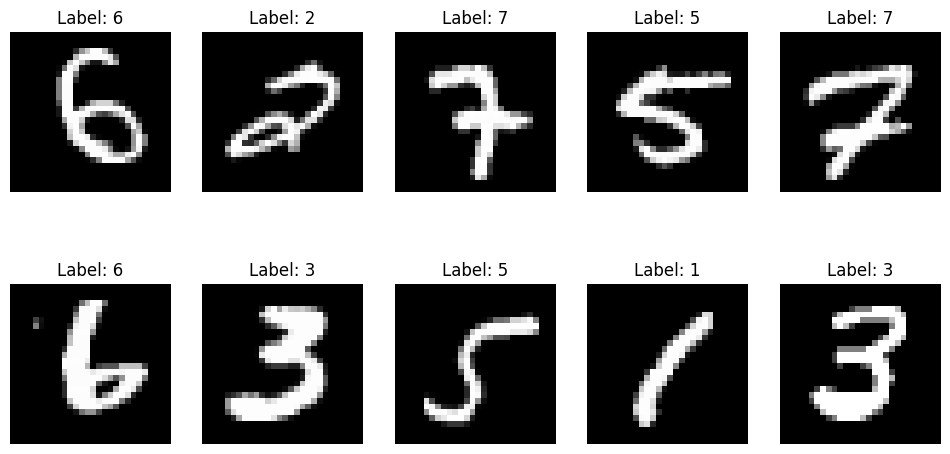

In [43]:
# Пример отображения нескольких изображений и их меток
def display_sample_images(X, y, num_images=8):
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        image = X[i].reshape(28, 28)  # Преобразуем одномерный вектор обратно в изображение 28x28
        label = y[i]  # Метка класса
        
        plt.subplot(2, int(num_images/2), i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Label: {label}")
        plt.axis('off')
    plt.show()


#Покажем несколько изображений с метками из тренировочной выборки
print("Примеры изображений и меток для тренировочной выборки:")
display_sample_images(X_train_normalized, y_train, num_images=10)
print("Примеры изображений и меток для тестовой выборки:")
display_sample_images(X_test_normalized, y_test, num_images=10)

In [44]:
# Вытянем матрицу пикселей 28x28 в строку 1x784, для полносвязных слоев
X_train_flattened = X_train_normalized.reshape(-1, 28*28)
X_test_flattened = X_test_normalized.reshape(-1, 28*28)

len(X_train_flattened[0]), len(X_test_flattened[0])

(784, 784)

In [45]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [46]:
# Преобразуем таргеты в one-hot вектора, для кросс-энтропии 
one_hot_train = pd.get_dummies(y_train)
y_train_one_hot= one_hot_train.to_numpy().astype(int)

one_hot_test = pd.get_dummies(y_test)
y_test_one_hot = one_hot_test.to_numpy().astype(int)


In [47]:
print(f"Количество получившихся таргетных значений на train = {len(y_train_one_hot)}")
print(f"Количество элементов в one-hot векторах на train = {len(y_train_one_hot[0])}")
print(f"Сравнение исходного таргетного значения с получившимся вектором на train:")
print(f"Исходное значение = {y_train[0]}")
print(f"Получившийся вектор =  {y_train_one_hot[0]}")
print("////////////////////////////////////////////////////////////////////////////////")      
print(f"Количество получившихся таргетных значений на test = {len(y_test_one_hot)}")
print(f"Количество элементов в one-hot векторах на test = {len(y_test_one_hot[0])}")
print(f"Сравнение исходного таргетного значения с получившимся вектором на test:")
print(f"Исходное значение = {y_test[0]}")
print(f"Получившийся вектор =  {y_test_one_hot[0]}")

Количество получившихся таргетных значений на train = 60000
Количество элементов в one-hot векторах на train = 10
Сравнение исходного таргетного значения с получившимся вектором на train:
Исходное значение = 4
Получившийся вектор =  [0 0 0 0 1 0 0 0 0 0]
////////////////////////////////////////////////////////////////////////////////
Количество получившихся таргетных значений на test = 10000
Количество элементов в one-hot векторах на test = 10
Сравнение исходного таргетного значения с получившимся вектором на test:
Исходное значение = 6
Получившийся вектор =  [0 0 0 0 0 0 1 0 0 0]


In [48]:
X_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
# Гиперпараметры сети
input_size = 28 * 28  # Размер входного слоя
hidden_size = 300     # Количество нейронов в скрытом слое
output_size = 10      # Количество классов (10 цифр)
learning_rate = 0.1   # Скорость обучения

# Инициализация весов случайными значениями
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2.0 / input_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2.0 / hidden_size)
b2 = np.zeros((1, output_size))

# Функция ReLU и её производная
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Функция softmax
def softmax(x):
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Функция кросс-энтропии
def cross_entropy_loss(y_true, y_pred):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred + 1e-9)) / m

# Функция для вычисления точности
def accuracy(y_true, y_pred):
    y_true_labels = np.argmax(y_true, axis=1)
    y_pred_labels = np.argmax(y_pred, axis=1)
    return np.mean(y_true_labels == y_pred_labels)


In [50]:
def forward(X):
    # Прямое распространение
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = softmax(z2)
    return z1, a1, z2, a2

def backward(X, y_true, z1, a1, z2, a2):
    # Обратное распространение ошибки
    m = X.shape[0]

    dz2 = a2 - y_true  # Ошибка на выходе Вместо кросс-энтропии
    dW2 = np.dot(a1.T, dz2) / m
    db2 = np.sum(dz2, axis=0, keepdims=True) / m
    
    dz1 = np.dot(dz2, W2.T) * relu_derivative(z1)  # Ошибка на скрытом слое
    dW1 = np.dot(X.T, dz1) / m
    db1 = np.sum(dz1, axis=0, keepdims=True) / m
    
    return dW1, db1, dW2, db2

def update_weights(dW1, db1, dW2, db2, learning_rate):
    global W1, b1, W2, b2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2


In [51]:
# Параметры обучения
epochs = 20
batch_size = 64
X_train = X_train_flattened.copy()
y_train = y_train_one_hot.copy()

# Начало обучения
for epoch in range(epochs):
    permutation = np.random.permutation(X_train.shape[0])
    X_train_shuffled = X_train[permutation]
    y_train_shuffled = y_train[permutation]
    
    total_loss = 0
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train_shuffled[i:i + batch_size]
        y_batch = y_train_shuffled[i:i + batch_size]
        
        # Прямое распространение
        z1, a1, z2, a2 = forward(X_batch)
        
        # Вычисление ошибки
        loss = cross_entropy_loss(y_batch, a2)
        total_loss += loss
        
        # Обратное распространение ошибки
        dW1, db1, dW2, db2 = backward(X_batch, y_batch, z1, a1, z2, a2)
        
        # Обновление весов
        update_weights(dW1, db1, dW2, db2, learning_rate)
    
    # Вывод ошибки и точности после каждой эпохи
    z1, a1, z2, a2 = forward(X_train)
    train_accuracy = accuracy(y_train, a2)
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {total_loss:.4f}, Accuracy: {train_accuracy:.4f}')


Epoch 1/20, Loss: 333.7175, Accuracy: 0.9379
Epoch 2/20, Loss: 173.8517, Accuracy: 0.9561
Epoch 3/20, Loss: 129.3008, Accuracy: 0.9689
Epoch 4/20, Loss: 103.0540, Accuracy: 0.9752
Epoch 5/20, Loss: 86.2415, Accuracy: 0.9769
Epoch 6/20, Loss: 73.3713, Accuracy: 0.9808
Epoch 7/20, Loss: 63.9975, Accuracy: 0.9842
Epoch 8/20, Loss: 56.2240, Accuracy: 0.9860
Epoch 9/20, Loss: 49.9506, Accuracy: 0.9885
Epoch 10/20, Loss: 44.8573, Accuracy: 0.9891
Epoch 11/20, Loss: 40.0860, Accuracy: 0.9912
Epoch 12/20, Loss: 36.4781, Accuracy: 0.9898
Epoch 13/20, Loss: 32.9162, Accuracy: 0.9928
Epoch 14/20, Loss: 30.0136, Accuracy: 0.9944
Epoch 15/20, Loss: 27.4735, Accuracy: 0.9946
Epoch 16/20, Loss: 24.8931, Accuracy: 0.9958
Epoch 17/20, Loss: 22.8101, Accuracy: 0.9960
Epoch 18/20, Loss: 20.6597, Accuracy: 0.9961
Epoch 19/20, Loss: 19.1705, Accuracy: 0.9975
Epoch 20/20, Loss: 17.5374, Accuracy: 0.9974


In [52]:
# Тестирование на тестовых данных
X_test = X_test_flattened.copy()
y_test = y_test_one_hot.copy()
z1, a1, z2, a2 = forward(X_test)
test_accuracy = accuracy(y_test, a2)
print(f'Test Accuracy: {test_accuracy:.4f}')


Test Accuracy: 0.9803
